# Embedded Power BI Reports in Jupyter Notebooks

## Objetivos del Notebook

El propósito del siguiente Notebook es aprender cómo incrustar e interactuar con informes creados en Power BI en el entorno web de Jupyter Notebook.

Esta es una buena práctica si queremos que el trabajo que realizan los diseñadores de informes sea inmediatamente utilizable por los analistas que se sienten cómodos usando Jupyter Notebooks. Además, podemos exportar datos de los visuales del informe a Jupyter Notebook para una exploración de datos en profundidad.

Por lo tanto, incrustaremos un informe creado en Power BI Desktop dónde se analizan una serie de variables que influyen en la calidad del vino, tanto blanco como rojo.

Puede ver los datos de origen utilizados para el informe en el siguiente enlace:

<a href="https://www.kaggle.com/code/danielpanizzo/red-and-white-wine-quality/data">Kaggle Red and White Wine Quality</a>

El informe que queremos incrustar en Jupyter Notebook publicado en Power BI es el siguiente:

<a href="https://app.powerbi.com/groups/b04d2fda-2591-4667-8476-30948e3d3635/reports/676251a6-4a9f-40b8-8227-6e1eac46e9f4/ReportSection">Report Análisis Calidad Vino</a>

Para ello, intentaremos seguir los siguientes pasos propuestos por la comunidad microsoft power bi:

<img src="embed powerbi reports in jupyter notebooks.png">

¡Empezamos!

## 1 Importar Librerías Requeridas

Iniciamos el proceso instalando la librería **powerbiclient** para importar las clases y modelos que necesitamos.

In [ ]:
##Install the powerbiclient library
!pip install powerbiclient

Instalamos otras librerías que necesitaremos para el posterior análisis de los datos.

In [1]:
##Import the requiered powerbicliente class and models from the packages
from powerbiclient import Report, models

# Import the DeviceCodeLoginAuthentication class to authenticate against Power BI
from powerbiclient.authentication import DeviceCodeLoginAuthentication

# Import packages to interact with the embeded report
from io import StringIO #object in memory file
from ipywidgets import interact
import requests

##Import other packages for data management and visualization
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## 2 Conectar y cargar el informe de Power BI

### 2.1 Autentificarnos en Power BI utilizando el Azure AD

Elegimos el método de **autenticación de flujo de dispositivos** para conectar Jupyter Notebook con nuestros informes de Power BI.

In [2]:

# Initiate device authentication
device_auth = DeviceCodeLoginAuthentication()



Performing interactive authentication. Please follow the instructions on the terminal.
 To sign in, use a web browser to open the page https://microsoft.com/devicelogin and enter the code DKXXF95M7 to authenticate.
You have logged in.
Interactive authentication successfully completed.


Tenemos que copiar el código de autenticación e ingresarlo en el cuadro de diálogo de autenticación del inicio de sesión de Microsoft. Luego, seleccionamos la cuenta que queremos usar para autenticar para completar el proceso de inicio de sesión.

Una vez ingresadas correctamente las credenciales de la cuenta de microsoft y conectado a la plataforma Azure, aparecerá el siguiente mensaje confirmando que la autenticación fue exitosa:

<img src="Autentification Microsfot Azure Platform.png">

En caso de que desee utilizar el método de **token de acceso**, también conocido como access token, para autenticarse en Power BI, primero debe crearlo. Para obtener más información, consulte el siguiente enlace:

<a href="https://docs.microsoft.com/en-us/power-bi/developer/embedded/embed-tokens">Embedded analytics application tokens</a>

### 2.2 Establezca el ID del espacio de trabajo y el ID del informe que desea incrustar

Para insertar el informe, debemos proporcionar una ID de informe (report publicado en el servicio de Power BI) y una ID de grupo (workspace del servicio de Power BI Service), que se pueden encontrar en la URL del informe que estamos insertando.

In [3]:
#Workspace ID details
group_id="b04d2fda-2591-4667-8476-30948e3d3635"

#Report ID details
report_id="676251a6-4a9f-40b8-8227-6e1eac46e9f4"

En caso de que desee saber cómo obtener el ID de área de trabajo o grupo y el ID del informe en el servicio de Power BI, consulte el siguiente enlace:

<a href="https://docs.microsoft.com/es-es/power-bi/developer/embedded/embed-organization-app">Inserción de un informe de Power BI en una aplicación para su organización</a>

### 2.3 Cree una instancia del informe de Power BI que desee incrustar

Cree el objeto del informe para insertar el informe y las imágenes de Power BI en Jupyter Notebook.

In [4]:
#Create an instance of Power BI repor
report = Report(group_id=group_id, report_id=report_id, auth=device_auth)


### 2.4 Establecer controladores de eventos de informe

Podemos configurar algunos controladores de eventos de informes, como devolución de llamada cargada o eventos de manejo de errores.

In [5]:
def loaded_callback(event_details):
    print('The report successfully loaded.')
    
def error_callback(event_details):
    print('Error.',event_details)
    
report.on('loaded',loaded_callback)
report.on('error',error_callback)

### 2.5 Cargue el informe de Power BI deseado en la celda de salida

Llamar al objeto de informe representa la salida del informe en Notebook.

Cuando se completa el procesamiento del informe, se activa el evento de devolución de llamada cargado y el resultado de texto especificado se muestra debajo del informe.

In [6]:

#Show the report
report


Report()

The report successfully loaded.


### 2.6 Cambiar las dimensiones de un informe incrustado de Power BI

Podemos ajustar el tamaño de informe incrustrado para ajustarlo a nuestro gusto.

Tenga en cuanta de que los cambios los debe de visualizar en la incrustración del informe desplegada anteriormente.

In [7]:
# Change dimensions of embedded report
report.set_dimensions(500, 950)

## 3 Exporta datos de los visuales


### 3.1 Obtener la página activa


Jupyter Notebook nos permite interactuar con el informe incrustado de Power BI. Podemos usar la librería de pandas para obtener la página activa y los nombres de los gráficos que se incluyen en el informe.

In [8]:
#Get the name of the active page of the report
def get_active_page(self):  
    # Get list of pages
    pages = self.get_pages()
    active_page = {}
    for page in pages:  
        # Get active page
        if page['isActive'] == True:
            active_page = page
            break
    return active_page

#Define variables to get the active page name
active_page = get_active_page(report)
active_page_name = active_page['name']

#Get list of visuals on active page
visuals = report.visuals_on_page(active_page_name)

print(visuals)

### 3.2  Obtener el objeto visual cuyos datos se van a exportar

In [9]:
#Define variables to get the active page name
active_page = get_active_page(report)
active_page_name = active_page['name']

#Get list of visuals on active page
visuals = report.visuals_on_page(active_page_name)

print(visuals)

[{'name': '31de53b1a1006441c4b6', 'title': 'Volatilidad Acidez por Calidad y Tipo Vino', 'type': 'columnChart', 'layout': {'x': 22.346627571638827, 'y': 178.9141630901289, 'z': 0, 'width': 406.52360515021456, 'height': 291.1587982832618, 'displayState': {'mode': 0}}}, {'name': '9f466516a292174e4560', 'title': 'Alcohol por Tipo Vino', 'type': 'pieChart', 'layout': {'x': 439.48497825957946, 'y': 178.5407729145292, 'z': 1000, 'width': 406.52360515021456, 'height': 291.1587982832618, 'displayState': {'mode': 0}}}, {'name': '53d34d24c7bb8aab4588', 'title': 'Cloruro por Calidad y Tipo Vino', 'type': 'donutChart', 'layout': {'x': 858.3690987124462, 'y': 178.9141630901289, 'z': 2000, 'width': 406.52360515021456, 'height': 291.1587982832618, 'displayState': {'mode': 0}}}, {'name': 'cd4c2ae4de03027b953b', 'title': 'Tabla', 'type': 'tableEx', 'layout': {'x': 15.107296137339056, 'y': 505.4077253218884, 'z': 3000, 'width': 1249.7854077253219, 'height': 214.2489270386266, 'displayState': {'mode': 0}

In [10]:
# Get visual whose type is 'columnChart'
visual_columnChart = next(filter(lambda visual: visual['type'] == 'columnChart', visuals))
visual_name_columnChart = visual_columnChart['name']

print(visual_name_columnChart)

31de53b1a1006441c4b6


In [11]:
# Get visual whose type is 'donutChart'
visual_donutChart = next(filter(lambda visual: visual['type'] == 'donutChart', visuals))
visual_name_donutChart = visual_donutChart['name']

print(visual_name_donutChart)

53d34d24c7bb8aab4588


### 3.3 Exportar datos resumidos desde un visual del informe incrustado

In [12]:
#export summary data from columnChart visual
summarized_exported_data1 = report.export_visual_data(active_page_name, visual_name_columnChart, rows = 50)

print(summarized_exported_data1)

Calidad,Tipo Vino,Volatilidad Acidez
Regular Malo,red,165038
Regular Malo,white,129762
Regular Bueno,white,31130
Malo,red,17464
Regular Bueno,red,15460
Malo,white,11628
Bueno,white,149



In [13]:
#export summary data from donutChart visual
summarized_exported_data2 = report.export_visual_data(active_page_name, visual_name_donutChart, rows = 50)

print(summarized_exported_data2)

Calidad,Tipo Vino,Cluorudo
Regular Malo,white,156782
Regular Malo,red,105439
Regular Bueno,white,36533
Regular Bueno,red,15159
Malo,white,7873
Malo,red,4726
Bueno,white,137



### 3.4 Exportar datos subyacentes desde un visual del informe incrustado

In [14]:
# Get visual whose type is 'columnChart'
visual_columnChart = next(filter(lambda visual: visual['type'] == 'columnChart', visuals))
visual_name_columnChart = visual_columnChart['name']


#export underlying data from columnChart visual
underlying_exported_data1 = report.export_visual_data(active_page_name, visual_name_columnChart, rows = 5, 
                                                      export_data_type = models.ExportDataType.UNDERLYING.value)

print(underlying_exported_data1)

Calidad,Tipo Vino,Volatilidad Acidez,quality
Bueno,white,24,9
Bueno,white,26,9
Bueno,white,27,9
Bueno,white,36,9
Bueno,white,36,9



In [15]:
#export underlying data from donutChart visual
underlying_exported_data2 = report.export_visual_data(active_page_name, visual_name_donutChart, rows = 5, export_data_type = models.ExportDataType.UNDERLYING.value)

print(underlying_exported_data2)

Calidad,Tipo Vino,Cluorudo,quality
Bueno,white,18,9
Bueno,white,21,9
Bueno,white,31,9
Bueno,white,32,9
Bueno,white,35,9



### 3.5 Convierta los datos visuales exportados en CSV y cárguelos en el marco de datos de pandas

In [16]:
#transfer the visual data into an object in memory file
data_visual = StringIO(summarized_exported_data1)

#convert the object in memory file into a Pandas Dataframe
df_data_visual = pd.read_csv(data_visual, sep=",")

#check the information of the df
df_data_visual.head(30)

,Calidad,Tipo Vino,Volatilidad Acidez
0,Regular Malo,red,165038
1,Regular Malo,white,129762
2,Regular Bueno,white,31130
3,Malo,red,17464
4,Regular Bueno,red,15460
5,Malo,white,11628
6,Bueno,white,149


In [17]:
df_data_visual.dtypes

Calidad               object
Tipo Vino             object
Volatilidad Acidez     int64
dtype: object

In [18]:
df_data_visual_groypby=df_data_visual.groupby(['Calidad']).mean()

df_data_visual_groypby.head(30)

,Volatilidad Acidez
Calidad,
Bueno,149.0
Malo,14546.0
Regular Bueno,23295.0
Regular Malo,147400.0


In [19]:
df_data_visual_groypby.dtypes

Volatilidad Acidez    float64
dtype: object

## 4 Interactuar con los datos extraídos del informe

### 4.1 Visualiza los datos

Ahora podemos visualizar los datos con el diagrama del marco de datos.

<AxesSubplot:ylabel='Calidad'>

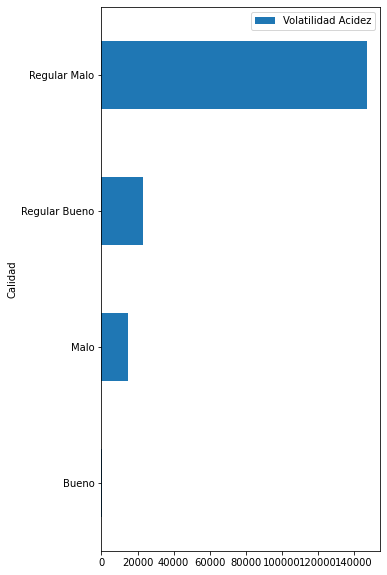

In [20]:
#visualize the data using a bar chart

df_data_visual_groypby.plot.barh(y="Volatilidad Acidez",figsize=(5,10))

### 4.2 Cambiar el tipo de datos

Podemos cambiar el tipo de datos de las columnas del gráfico de datos que exportamos

In [21]:
#change the data type of the 'Privados' column from integer to string
df_data_visual['Volatilidad Acidez']=df_data_visual['Volatilidad Acidez'].astype(str)

df_data_visual

,Calidad,Tipo Vino,Volatilidad Acidez
0,Regular Malo,red,165038
1,Regular Malo,white,129762
2,Regular Bueno,white,31130
3,Malo,red,17464
4,Regular Bueno,red,15460
5,Malo,white,11628
6,Bueno,white,149


In [22]:
df_data_visual.dtypes

Calidad               object
Tipo Vino             object
Volatilidad Acidez    object
dtype: object

## ****** Fin del fichero! ******